<a href="https://colab.research.google.com/github/J0hnFe/CorreccionExamen/blob/main/California_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Cuando tenemos una prediccion como este caso, no necesitamos funcion de activacion en la capa de salida

from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

In [2]:

print(california_housing.DESCR)


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [3]:
california_housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
california_housing.target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

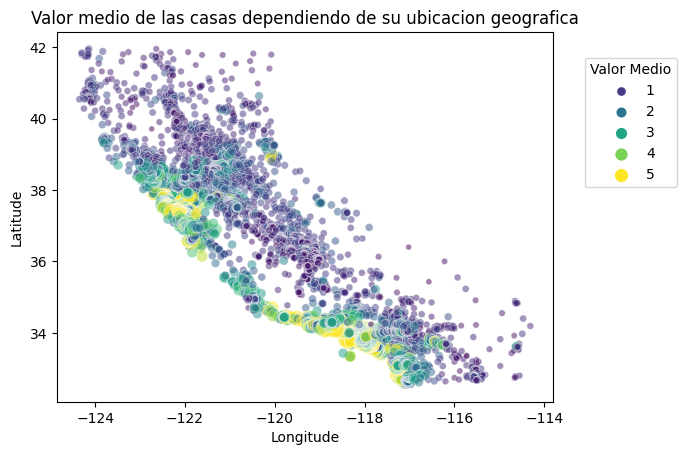

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=california_housing.frame, x="Longitude", y="Latitude",
                size="MedHouseVal", hue="MedHouseVal",
                palette="viridis", alpha=0.5)
plt.legend(title="Valor Medio", bbox_to_anchor=(1.05, 0.95),
           loc="upper left")
_ = plt.title("Valor medio de las casas dependiendo de su ubicacion geografica")

In [6]:
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
import random
import numpy as np
import tensorflow as tf
from google.colab import drive
import sys
import os

In [7]:
drive.mount('/content/drive')
BASE_FOLDER = '/content/drive/MyDrive/Colab Notebooks/Entrenamientocalifornia'
sys.path.append(BASE_FOLDER)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
x_data = california_housing.data
y_data = california_housing.target

##Explorando datos

In [9]:
#Que tipos de datos tengo:

x_data.dtypes
#y_data.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object

In [10]:
len(x_data)
#len(y_data)

20640

In [11]:
x_data.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24


##Correlacion de los datos

<Axes: >

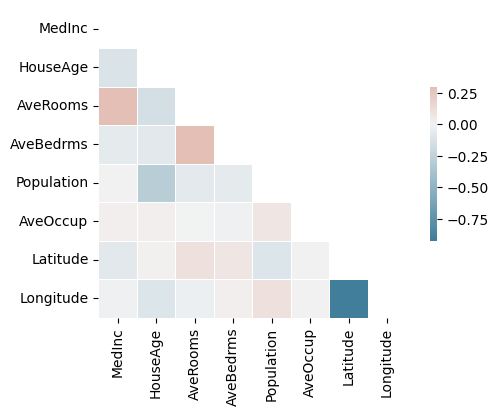

In [12]:
import seaborn as sns
corr = x_data.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

f, ax = plt.subplots(figsize = (6, 4))
cmap = sns.diverging_palette(230, 20, as_cmap = True)
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = .3, center = 0, square = True, linewidths = .5, cbar_kws = {'shrink': .5})

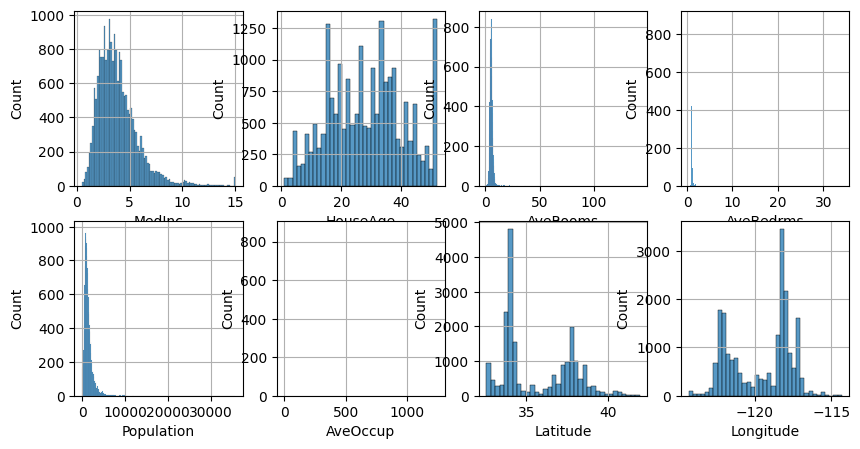

In [13]:
columnas = x_data.columns
fig, axs = plt.subplots(2, 4, figsize = (10, 5), constrained_layout = False, sharex = False, sharey = False)

for i, ax1 in enumerate(axs.flat):
  sns.histplot(data = x_data, x = columnas[i], ax = ax1)
  ax1.grid()

##Normalizar los datos

##Preparar datos

In [14]:
'''
Se normalizan a nivel de cada columna a diferencia de Cifar10
La normalizacion centra y escala los datos (pero mantiene su distribucion)
'''
from sklearn.preprocessing import MinMaxScaler  #Nos va a ayudar a normalizar
normalizador = MinMaxScaler()
x_data_norm = normalizador.fit_transform(x_data) #Entreno y transformo. 'fit_transform' calcula min y max y escupe un normalizado

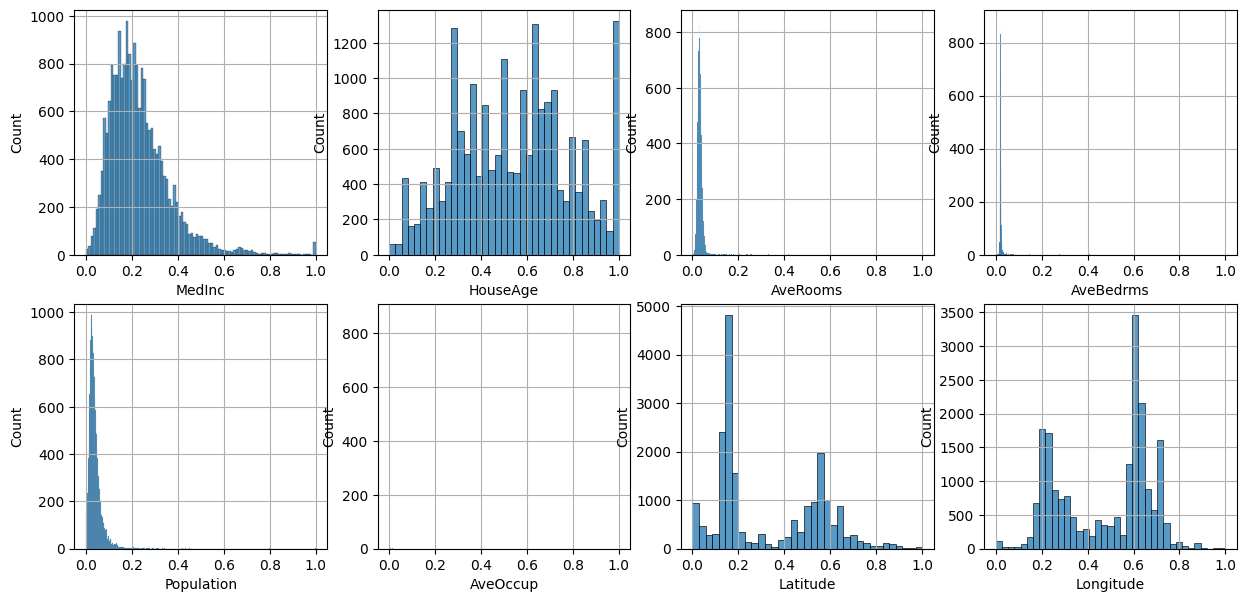

In [15]:
import pandas as pd

columnas = x_data.columns
datos = pd.DataFrame(x_data_norm, columns = columnas)

fig, axs = plt.subplots(2, 4, figsize = (15, 7), constrained_layout = False, sharex = False, sharey = False)

for i, ax1 in enumerate(axs.flat):
  sns.histplot(data = datos, x = columnas[i], ax = ax1)
  ax1.grid()

##Estandarizar datos

In [16]:
'''
La estandarizacion toma tambien valores negativos, la normalizacion no.
Si usara luego de estandarizar una funcion de activacion como relu que descarta los negativos, estaria descartando todos esos valores
Recomendacion:
Datos normalizados: RELU
Datos estandarizados: Sigmoid
'''
from sklearn.preprocessing import StandardScaler
estandarizador = StandardScaler()
estandarizador.fit(x_data)
x_data_est = estandarizador.transform(x_data)

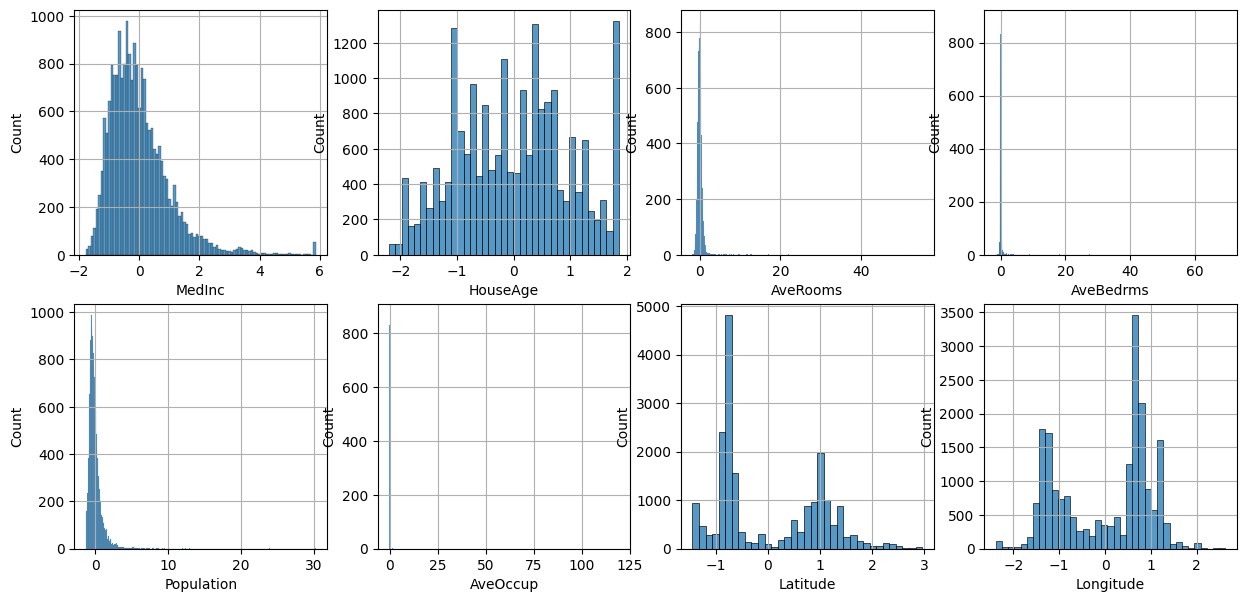

In [17]:
columnas = x_data.columns
datos = pd.DataFrame(x_data_est, columns = columnas)

fig, axs = plt.subplots(2, 4, figsize = (15, 7), constrained_layout = False, sharex = False, sharey = False)

for i, ax1 in enumerate(axs.flat):
  sns.histplot(data = datos, x = columnas[i], ax = ax1)
  ax1.grid()

##Retirar outliers o valores atipicos

In [39]:
from sklearn.covariance import EllipticEnvelope
from scipy import stats
outlier_method = EllipticEnvelope()
outlier_method.fit(x_data_est)

scores_pred = outlier_method.decision_function(x_data_est)

Q1 = stats.scoreatpercentile(scores_pred, 10) #porcentaje fuera
Q3 = stats.scoreatpercentile(scores_pred, 90) #porcentaje dentro

RIC = Q3 - Q1
li = Q1 - 1.5*RIC
ls = Q3 + 1.5*RIC

print('Lim. Inf: ' + str(li))
print('Lim. Sup: ' + str(ls))

#Estimacion outliers
pos_i = np.where(scores_pred < li)
pos_s = np.where(scores_pred > ls)

#Matriz de outliers
mask_outliers = np.ones(np.shape(scores_pred))
mask_outliers[pos_i] = 0
mask_outliers[pos_s] = 0
valores, ocurrencias = np.unique(mask_outliers == 1, return_counts = True)

print(valores)
print(ocurrencias)

x_data_valid = x_data_est[mask_outliers == 1]
df_invalid = x_data_est[mask_outliers == 0]

Lim. Inf: -46.88209789803921
Lim. Sup: 78.13682983006534
[False  True]
[  758 19882]


In [43]:
#Quitamos tmb de las y's
y_data_valid = y_data[mask_outliers == 1]

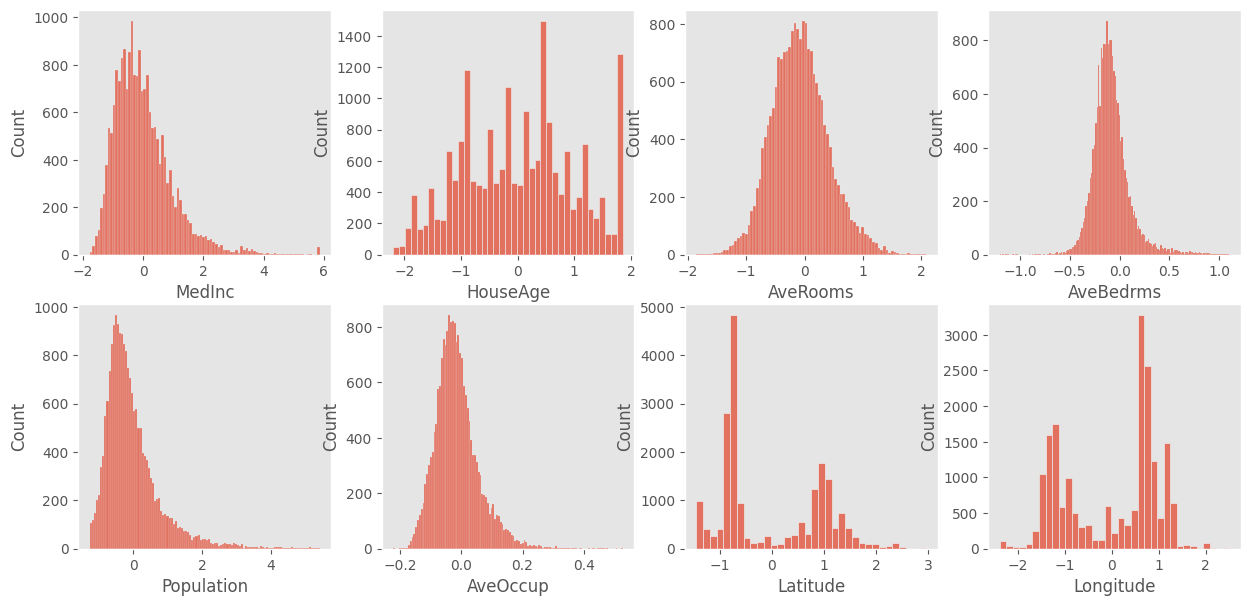

In [40]:
#Aqui visualizamos la limpieza de los datos, sin outliers
columnas = x_data.columns
datos = pd.DataFrame(x_data_valid, columns = columnas)

fig, axs = plt.subplots(2, 4, figsize = (15, 7), constrained_layout = False, sharex = False, sharey = False)

for i, ax1 in enumerate(axs.flat):
  sns.histplot(data = datos, x = columnas[i], ax = ax1)
  ax1.grid()

<Axes: >

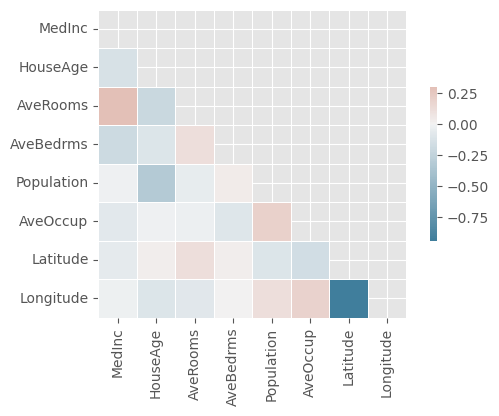

In [41]:
#Veamos ahora la correlacion de los datos limpiados
corr = datos.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

f, ax = plt.subplots(figsize = (6, 4))
cmap = sns.diverging_palette(230, 20, as_cmap = True)
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = .3, center = 0, square = True, linewidths = .5, cbar_kws = {'shrink': .5})

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_data_valid, y_data_valid, test_size = 0.2)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.2)

In [45]:
print('Validation/Resampling')
print('Datos para entrenamiento {} {}'.format(x_train.shape, y_train.shape))
print('Datos para validacion {} {}'.format(x_val.shape, y_val.shape))
print('Datos para test {} {}'.format(x_test.shape, y_test.shape))

Validation/Resampling
Datos para entrenamiento (12724, 8) (12724,)
Datos para validacion (3977, 8) (3977,)
Datos para test (3181, 8) (3181,)


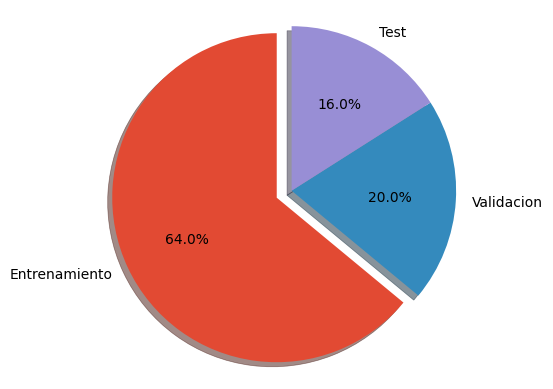

In [46]:
labels = 'Entrenamiento', 'Validacion', 'Test'
sizes =[x_train.shape[0], x_val.shape[0], x_test.shape[0]]
explode = (0.1, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 90)
ax1.axis('equal')
plt.show()

In [47]:
x_train = np.expand_dims(x_train, -1) #En la ult columna agregue una adicional
x_val = np.expand_dims(x_val, -1)
x_test = np.expand_dims(x_test, -1)

In [48]:
#Me sigue faltando una dimension, vuelvo a expandir
x_train = np.expand_dims(x_train, -1)
x_val = np.expand_dims(x_val, -1)
x_test = np.expand_dims(x_test, -1)

In [49]:
print('Datos para entrenamiento {}'.format(x_train.shape))
print('Datos para validacion {}'.format(x_val.shape))
print('Datos para test {}'.format(x_test.shape))

Datos para entrenamiento (12724, 8, 1, 1)
Datos para validacion (3977, 8, 1, 1)
Datos para test (3181, 8, 1, 1)


##Diseñar modelo

In [50]:
from keras.models import Sequential
from keras.layers import Dense, Flatten #Flatten es la capa de entrada
from keras.activations import relu, sigmoid, softmax #Sigmoid y Softmax las mas utilizadas para clasificacion
from keras.regularizers import L1, L2, L1L2
import keras

In [54]:
ExperimentoNo = 9

FOLDER_EXP = BASE_FOLDER + 'Exp' + str(ExperimentoNo) + '/'
os.makedirs(FOLDER_EXP, exist_ok = True)
sys.path.append(FOLDER_EXP)

model = Sequential()
model.add(Flatten(input_shape = (x_train.shape[1], x_train.shape[2], x_train.shape[3]), name = 'Entrada'))
model.add(Dense(64, activation = sigmoid, kernel_regularizer = L1L2(), name = 'CapaOculta1'))
model.add(Dense(64, activation = sigmoid, kernel_regularizer = L1L2(), name = 'CapaOculta2'))
model.add(Dense(32, activation = sigmoid, kernel_regularizer = L1L2(), name = 'CapaOculta3'))
model.add(Dense(16, activation = sigmoid, kernel_regularizer = L1L2(), name = 'CapaOculta4'))
model.add(Dense(1, name = 'Salida'))
model.summary()

model.save(FOLDER_EXP + '\Modelo.h5')

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Entrada (Flatten)           (None, 8)                 0         
                                                                 
 CapaOculta1 (Dense)         (None, 64)                576       
                                                                 
 CapaOculta2 (Dense)         (None, 64)                4160      
                                                                 
 CapaOculta3 (Dense)         (None, 32)                2080      
                                                                 
 CapaOculta4 (Dense)         (None, 16)                528       
                                                                 
 Salida (Dense)              (None, 1)                 17        
                                                                 
Total params: 7,361
Trainable params: 7,361
Non-traina

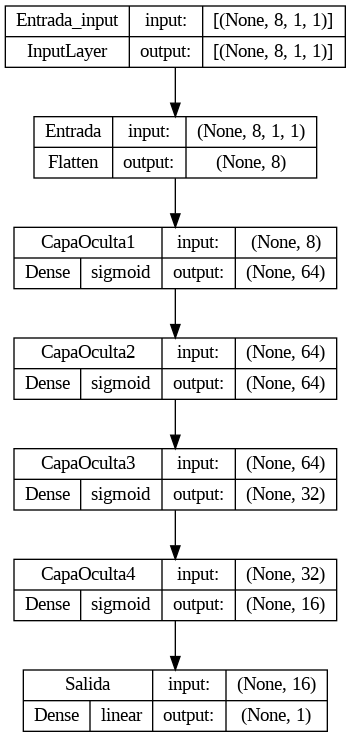

In [55]:
#Todos optimizadores basados en descenso del gradiente
#Batch size: 'Grupos' cantidad en los que irá evaluando

#opt = keras.optimizers.Adam() #no funciona en este caso
opt = keras.optimizers.RMSprop(0.001)

fperdidas = keras.losses.MSE #Forma en la que mido el 'y' que calculo es igual al 'y' esperado
metrica = keras.metrics.MAPE #Metricas sirven solo para monitorear, no involucrado en calculo de nuevos pesos
model.compile(optimizer = opt, loss = fperdidas, metrics = [metrica])
model.save(FOLDER_EXP + 'Modelo.h5')
model_img_file = FOLDER_EXP + 'Modelo.png'
tf.keras.utils.plot_model(model, to_file = model_img_file, show_shapes = True, show_layer_names = True, show_layer_activations = True)

In [27]:
from keras.callbacks import Callback

In [ ]:
epocas = 1000
b_size = 265 #Mas grande, entrena mas rapido

#Callback para que no se sobreentrene el modelo
parada_temprana = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 10) #Cuantas epocas de "paciencia"
guardar_pesos = tf.keras.callbacks.ModelCheckpoint(
    filepath = FOLDER_EXP,
    save_weights_only = True,
    monitor = 'val_mean_absolute_percentage_error',
    model = 'max',
    save_best_only = True
)

h = model.fit(x_train, y_train, batch_size = b_size, epochs = epocas, validation_data = (x_val, y_val), callbacks = [parada_temprana, guardar_pesos])

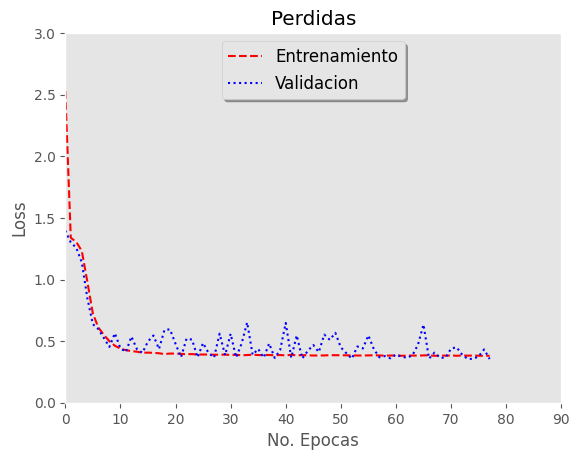

In [57]:
#Metricas
plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.plot(h.history['loss'], '--', label = 'Entrenamiento', c = 'r')
ax.plot(h.history['val_loss'], ':', label = 'Validacion', c = 'b')
ax.set(xlabel = 'No. Epocas', ylabel = 'Loss', title = 'Perdidas')
legend = ax.legend(loc = 'upper center', shadow = True, fontsize = '12')
#ax.set_xlim(0, epocas)
ax.set_xlim(0, 90)
ax.set_ylim(0, 3)
ax.grid()
fig_1 = plt.gcf()
plt.savefig(FOLDER_EXP + 'EntrenamientoLoss.jpg', bbox_inches = 'tight')
plt.show()

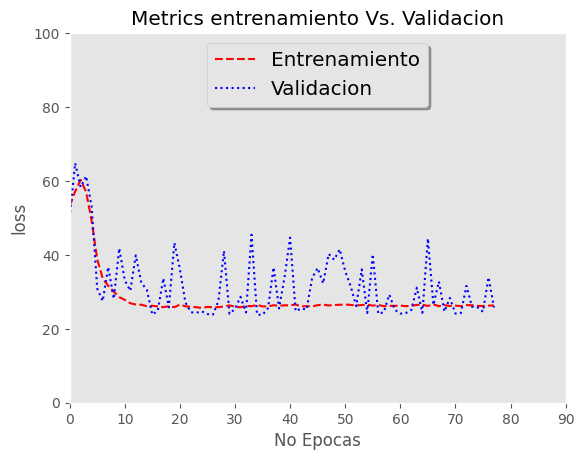

In [58]:
#Validacion
plt.style.use('ggplot')
fig, ax = plt.subplots()

ax.plot(h.history['mean_absolute_percentage_error'], '--', label = 'Entrenamiento', c = 'r')
ax.plot(h.history['val_mean_absolute_percentage_error'], ':', label = 'Validacion', c = 'b')
ax.set(xlabel = 'No Epocas', ylabel = 'loss', title = 'Metrics entrenamiento Vs. Validacion')
legend = ax.legend(loc = 'upper center', shadow = True, fontsize = 'x-large')

#ax.set_xlim(0, epocas)
ax.set_xlim(0, 90)
ax.set_ylim(0, 100)
ax.grid()
fig_1 = plt.gcf()

plt.savefig(FOLDER_EXP + 'EntrenamientoMetricas.jpg', bbox_inches = 'tight')
plt.show()

In [59]:
#Evaluo modelo con los datos de prueba
(perdidas, metricas) = model.evaluate(x_test, y_test, batch_size = b_size, verbose = 0)
print('[TEST]: Exactitud de la evaluacion: Metricas[{0:.2f}%] Perdidas[{1:.2f}]'.format(metricas, perdidas))

[TEST]: Exactitud de la evaluacion: Metricas[25.09%] Perdidas[0.38]


In [60]:
y_pred = model.predict(x_test)

100/100 [==============================] - 1s 5ms/step


In [61]:
from sklearn.metrics import median_absolute_error, mean_squared_error, max_error, mean_absolute_percentage_error

#Misma magnitud que 'y' (cientos de miles de dolares)
error_mae = median_absolute_error(y_pred, y_test)
error_mae

0.3251810455322266

In [62]:
#Misma magnitud que 'y' (cientos de miles de dolares)
error_max = max_error(y_pred, y_test)
error_mae

0.3251810455322266

In [63]:
#Porcentaje
porc_error = mean_absolute_percentage_error(y_pred, y_test)
porc_error

0.2339871431014499

<Axes: xlabel='MedHouseVal', ylabel='pred'>

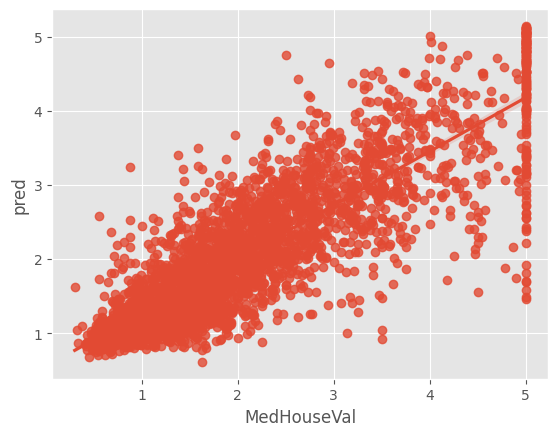

In [68]:
datos = pd.DataFrame(y_test)
datos['pred'] = y_pred

sns.regplot(x = 'MedHouseVal', y = 'pred', data = datos)